In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# Lấy đường dẫn của thư mục hiện tại
current_directory = os.getcwd()

# Lấy đường dẫn của thư mục cha
parent_directory = os.path.dirname(current_directory)

# Tạo đường dẫn đầy đủ tới file CSV
csv_path = os.path.join(parent_directory, "Processed\\CartoonNetworkAsia_81Post_Processed.csv")

# Đọc file CSV
df = pd.read_csv(csv_path)

In [8]:
# thêm index cho dataframe
df = df.reset_index(inplace = False)
df["index"] = df["index"] + 1

<Axes: xlabel='index'>

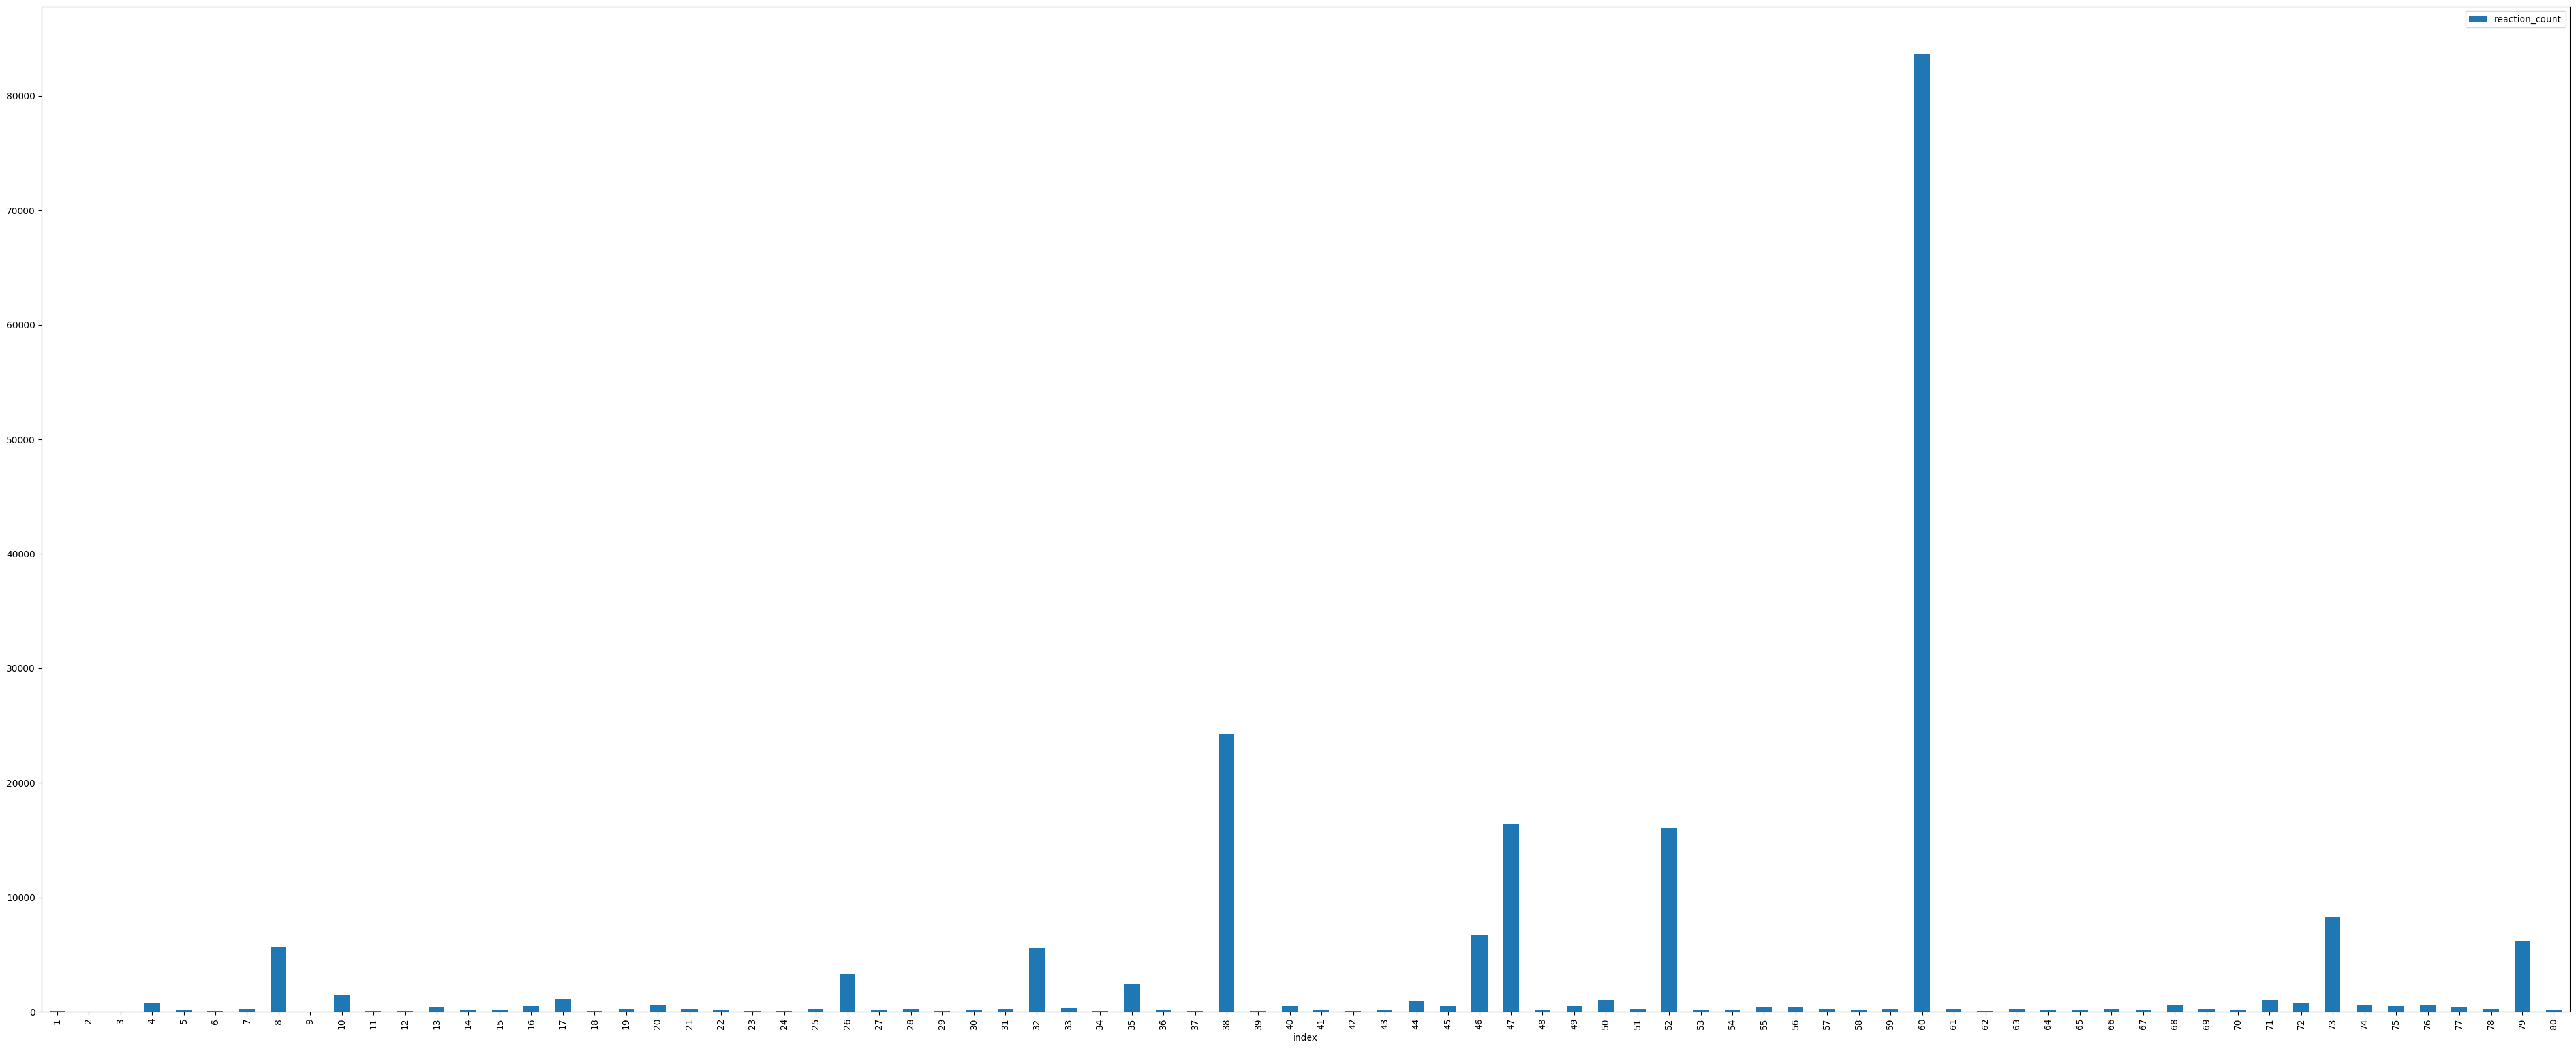

In [9]:
# biểu đồ số lượng reaction của từng bài đăng
df.plot(kind = "bar", x = "index", y = "reaction_count", figsize = (50, 20))

<Axes: xlabel='index'>

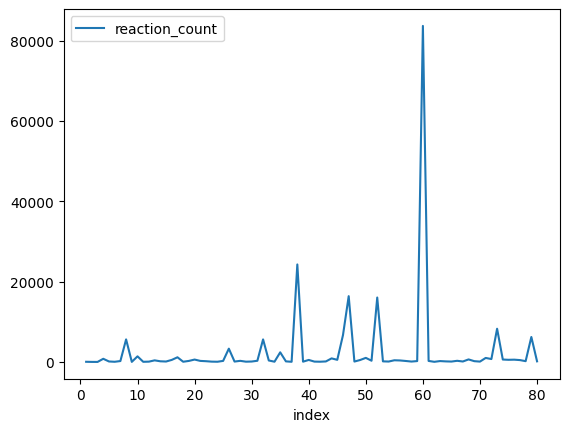

In [10]:
# biến động reaction qua từng bài đăng
df.plot(kind = "line", x = "index", y = "reaction_count")

In [11]:
# tổng số lượng reaction
sum(df.reaction_count)

198987

In [12]:
# lượng reaction trung bình
df.reaction_count.mean()

2487.3375

In [13]:
df.reaction_count.median()

250.5

In [14]:
# bài đăng nhiều reaction nhất
df.index[df['reaction_count'] == max(df.reaction_count)]

Index([59], dtype='int64')

In [15]:
df.iloc[59]

index                                                            60
post_id                                             697917729040830
post_text         Sorry Tom, The New York animals sure are #Team...
likes                                                         68224
comments                                                        268
shares                                                         5000
reaction_count                                                83629
like                                                          68224
love                                                         2834.0
wow                                                            65.0
angry                                                           5.0
haha                                                        12164.0
care                                                          321.0
sad                                                            16.0
hour                                            

In [16]:
# bài đăng ít reaction nhất
df.index[df['reaction_count'] == min(df.reaction_count)]

Index([2], dtype='int64')

In [17]:
df.iloc[2]

index                                                             3
post_id                                             736838365148766
post_text         Looks like Tom won't be fishing in the Singapo...
likes                                                             7
comments                                                          4
shares                                                           19
reaction_count                                                   10
like                                                              7
love                                                            0.0
wow                                                             0.0
angry                                                           0.0
haha                                                            3.0
care                                                            0.0
sad                                                             0.0
hour                                            

In [18]:
df

,index,post_id,post_text,likes,comments,shares,reaction_count,like,love,wow,angry,haha,care,sad,hour,date,day
0,1,738496031649666,Celebrate #WB100 with sunset movies under the ...,37,0,0,45,37,6.0,1.0,1.0,0.0,0.0,0.0,11,2023-11-06,Monday
1,2,738486251650644,Unlock your Barbie and Chelsea alter ego! Try ...,14,2,1,16,14,1.0,0.0,0.0,1.0,0.0,0.0,11,2023-11-06,Monday
2,3,736838365148766,Looks like Tom won't be fishing in the Singapo...,7,4,19,10,7,0.0,0.0,0.0,3.0,0.0,0.0,19,2023-11-05,Sunday
3,4,737572781741991,The chase is on in the Singapore Botanic Garde...,453,14,68,789,453,170.0,2.0,4.0,140.0,18.0,2.0,19,2023-11-04,Saturday
4,5,736877231811546,Ready to rock some outdoor superhero moves? ⚡️...,83,0,6,122,83,32.0,2.0,1.0,1.0,3.0,0.0,10,2023-11-03,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,76,681911200641483,The claws are out this August with Cat-stravag...,429,28,54,571,429,121.0,4.0,1.0,3.0,13.0,0.0,10,2023-08-01,Tuesday
76,77,681542050678398,Toontastic Kenergy all around 💯 Which of these...,228,20,63,466,228,172.0,1.0,0.0,58.0,7.0,0.0,19,2023-07-31,Monday
77,78,681350087364261,Celebrate the 9 lives of Cats with Cat-stravag...,125,8,7,198,125,66.0,1.0,0.0,0.0,6.0,0.0,11,2023-07-31,Monday
78,79,681290900703513,The iconic chase continues between Tom and Jer...,3309,281,1000,6216,3309,2069.0,45.0,31.0,33.0,127.0,602.0,9,2023-07-31,Monday


In [19]:
# tạo 1 series chứa tổng lượt tương tác của từng loại reaction
like = sum(df.like)
love = sum(df.love)
wow = sum(df.wow)
angry = sum(df.angry)
haha = sum(df.haha)
care = sum(df.care)
sad = sum(df.sad)

react_dict = {"like": like,
             "love": love,
             "wow": wow,
             "angry": angry,
             "haha": haha,
             "care": care,
             "sad": sad}

react_series = pd.Series(react_dict)

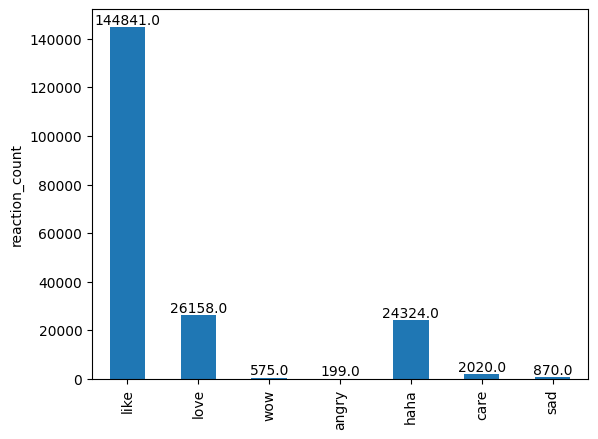

In [20]:
# biểu đồ lượt tương tác từng reaction
react_plt = react_series.plot(kind = "bar", ylabel = 'reaction_count')

for b in react_plt.patches:
    react_plt.annotate(b.get_height(), (b.get_x() + b.get_width() / 2, b.get_height()), ha = 'center', va = 'center', xytext = (0,5), textcoords = 'offset points')

plt.show()

<Axes: xlabel='index'>

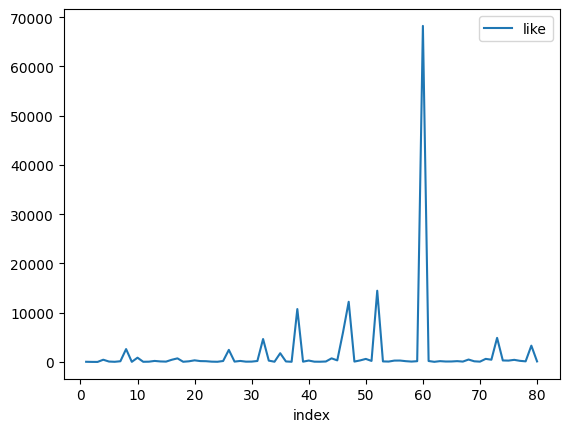

In [21]:
# sự biến động của like
df.plot(kind = "line", x = "index", y = "like")

In [22]:
# bài đăng nhiều like nhất
df.index[df['like'] == max(df.like)]

Index([59], dtype='int64')

In [23]:
df.iloc[59]

index                                                            60
post_id                                             697917729040830
post_text         Sorry Tom, The New York animals sure are #Team...
likes                                                         68224
comments                                                        268
shares                                                         5000
reaction_count                                                83629
like                                                          68224
love                                                         2834.0
wow                                                            65.0
angry                                                           5.0
haha                                                        12164.0
care                                                          321.0
sad                                                            16.0
hour                                            

In [24]:
# bài đăng ít like nhất
df.index[df['like'] == min(df.like)]

Index([2], dtype='int64')

In [25]:
df.iloc[2]

index                                                             3
post_id                                             736838365148766
post_text         Looks like Tom won't be fishing in the Singapo...
likes                                                             7
comments                                                          4
shares                                                           19
reaction_count                                                   10
like                                                              7
love                                                            0.0
wow                                                             0.0
angry                                                           0.0
haha                                                            3.0
care                                                            0.0
sad                                                             0.0
hour                                            

<Axes: xlabel='index'>

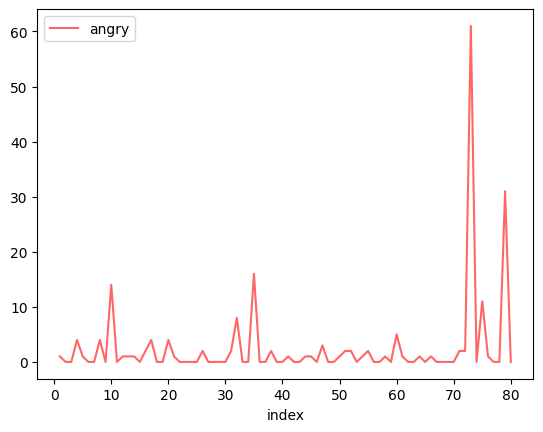

In [26]:
# sự biến động của angry
df.plot(kind = "line", x = "index", y = "angry", color = "#ff6666")

In [27]:
# bài đăng nhiều angry nhất
df.index[df['angry'] == max(df.angry)]

Index([72], dtype='int64')

In [28]:
df.iloc[72]

index                                                            73
post_id                                             681821073983829
post_text         Durians - do we love them? Tom and Jerry sure ...
likes                                                          4890
comments                                                        380
shares                                                          971
reaction_count                                                 8271
like                                                           4890
love                                                         1791.0
wow                                                            79.0
angry                                                          61.0
haha                                                         1198.0
care                                                          193.0
sad                                                            59.0
hour                                            